In [88]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import pandas.io.common
import subprocess
import tqdm 
import seaborn as sns
%matplotlib inline

## Coverage over all cells

In [37]:
cov = pd.read_csv("../data/pileup/14515X1.MT.coverage",sep="\t", header=None)
cov.columns = ["Chr", "Pos", "Coverage"]
cov

,Chr,Pos,Coverage
0,MT,1,8000
1,MT,2,8001
2,MT,3,8002
3,MT,4,8003
4,MT,5,8004
...,...,...,...
16564,MT,16565,3023
16565,MT,16566,2961
16566,MT,16567,2909
16567,MT,16568,2859


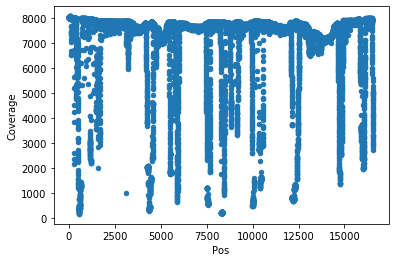

In [7]:
cov.plot.scatter(x="Pos", y="Coverage")

<BarContainer object of 4 artists>

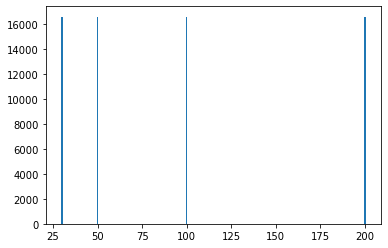

In [46]:
x_cov = [30,50,100,200]
f, ax = plt.subplots(1,1, sharey=True)
pct_cov = []
for i in x_cov:
    pct_cov.append((cov["Coverage"]>i).sum())

#pct_cov = np.array(pct_cov)/cov.shape[0]

plt.bar(x_cov, pct_cov)


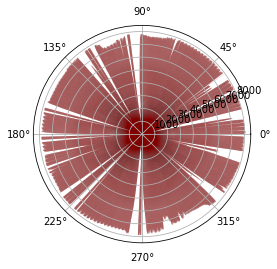

In [33]:
import numpy as np
import matplotlib.pyplot as plt

N = len(cov)
bottom = 8
max_height = 4

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = cov["Coverage"] #max_height*np.random.rand(N)
width = (2*np.pi) / N


ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.8)

plt.show()

# Single-cells

### Running wc -l for number of reads with CB vs overall
samtools view data/raw/14515X1.MT.bam | grep 'CB:Z' | wc -l  
120827139  
samtools view raw/14515X1.MT.bam | wc -l  
122606514  



In [107]:
(122606514-120827139)*100

177937500

## Count the number of reads for each cell barcode

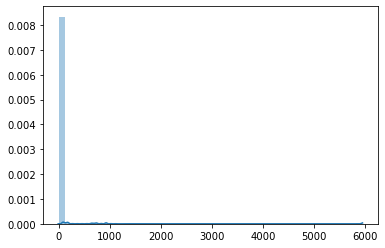

In [89]:
cell_reads = []
for bam_f in glob.glob("../data/scBam/*bam"):
    cmd1 = ["samtools", "view"]
    cmd1.append(bam_f)
    process1 = subprocess.Popen(cmd1,stdout=subprocess.PIPE)

    cmd2 = ["wc", "-l"]
    process2 = subprocess.Popen(cmd2,stdin=process1.stdout,stdout=subprocess.PIPE)
    #(out,err) = subprocess.Popen("samtools view ../data/scBam/CACAGGCCAGTCGTGC.bam | wc -l",stdout=subprocess.PIPE).communicate()
    (out,err) = process2.communicate()
    cell_reads.append(int(out.strip()))
    
sns.distplot(np.array(cell_reads))

Text(0.5, 0, 'Number of reads')

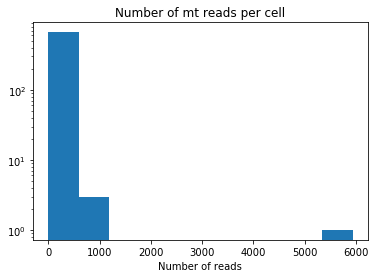

In [101]:
plt.hist(cell_reads,log=True)
plt.title("Number of mt reads per cell")
plt.xlabel("Number of reads")

In [96]:
print(f"Number of cells with no mt reads:{(np.array(cell_reads)==0).sum()}")

Number of cells with no mt reads:123


In [108]:
print(f"Coverage over all the single cells, assuming reads are 100bp: {np.array(cell_reads).sum()*100}")

print(f"Over entire sample: {cov['Coverage'].sum()}")

Coverage over all the single cells, assuming reads are 100bp: 1579700
Over entire sample: 114792360


## Plot over single-cells

### First create coverage

In [2]:
out_cov = "../data/scCov"
if not os.path.exists(out_cov):
    os.mkdir(out_cov)

In [11]:
for bam_f in glob.glob("../data/scBam/*bam"):
    # Generate coverage
    out_f = os.path.join(out_cov,os.path.basename(bam_f).replace('.bam',".cov"))
    cmd = f"samtools depth {bam_f} > {out_f}"
    print(cmd)
    !{cmd}
    

samtools depth ../data/scBam/CACAGGCCAGTCGTGC.bam > ../data/scCov/CACAGGCCAGTCGTGC.cov
samtools depth ../data/scBam/AGCGTATTCCTTCAAT.bam > ../data/scCov/AGCGTATTCCTTCAAT.cov
[E::bam_plp_push] The input is not sorted (reads out of order)
samtools depth ../data/scBam/GGTATTGGTTGATTCG.bam > ../data/scCov/GGTATTGGTTGATTCG.cov
samtools depth ../data/scBam/ATCCGAATCGGAGCAA.bam > ../data/scCov/ATCCGAATCGGAGCAA.cov
samtools depth ../data/scBam/TCAGGATTCATCATTC.bam > ../data/scCov/TCAGGATTCATCATTC.cov
samtools depth ../data/scBam/CGTGTAAAGGTACTCT.bam > ../data/scCov/CGTGTAAAGGTACTCT.cov
samtools depth ../data/scBam/TGCCCTAGTGGTCTCG.bam > ../data/scCov/TGCCCTAGTGGTCTCG.cov
samtools depth ../data/scBam/ACACTGATCAACGGGA.bam > ../data/scCov/ACACTGATCAACGGGA.cov
samtools depth ../data/scBam/GGAGCAACAGTAAGCG.bam > ../data/scCov/GGAGCAACAGTAAGCG.cov
samtools depth ../data/scBam/TTCTACATCCATGAAC.bam > ../data/scCov/TTCTACATCCATGAAC.cov
samtools depth ../data/scBam/TAGTGGTCAAGAGGCT.bam > ../data/scCov/T

samtools depth ../data/scBam/CCCATACCAGGTCTCG.bam > ../data/scCov/CCCATACCAGGTCTCG.cov
samtools depth ../data/scBam/GACTACAAGACAGAGA.bam > ../data/scCov/GACTACAAGACAGAGA.cov
samtools depth ../data/scBam/GACCAATGTCATACTG.bam > ../data/scCov/GACCAATGTCATACTG.cov
samtools depth ../data/scBam/AGACGTTTCTTAGAGC.bam > ../data/scCov/AGACGTTTCTTAGAGC.cov
samtools depth ../data/scBam/TTTGTCAAGCTTCGCG.bam > ../data/scCov/TTTGTCAAGCTTCGCG.cov
samtools depth ../data/scBam/GGGACCTCACACATGT.bam > ../data/scCov/GGGACCTCACACATGT.cov
samtools depth ../data/scBam/TGCGTGGCACATTAGC.bam > ../data/scCov/TGCGTGGCACATTAGC.cov
samtools depth ../data/scBam/CGAGCCAAGTCGCCGT.bam > ../data/scCov/CGAGCCAAGTCGCCGT.cov
samtools depth ../data/scBam/GGGATGACAGTTCATG.bam > ../data/scCov/GGGATGACAGTTCATG.cov
[E::bam_plp_push] The input is not sorted (reads out of order)
samtools depth ../data/scBam/CACACTCCACCCTATC.bam > ../data/scCov/CACACTCCACCCTATC.cov
samtools depth ../data/scBam/CTAGCCTAGTGAACGC.bam > ../data/scCov/C

samtools depth ../data/scBam/TTTGGTTTCCTCTAGC.bam > ../data/scCov/TTTGGTTTCCTCTAGC.cov
samtools depth ../data/scBam/CGAGCACAGCCACGTC.bam > ../data/scCov/CGAGCACAGCCACGTC.cov
samtools depth ../data/scBam/CTGAAACCAGATCTGT.bam > ../data/scCov/CTGAAACCAGATCTGT.cov
samtools depth ../data/scBam/CCAATCCTCACCTTAT.bam > ../data/scCov/CCAATCCTCACCTTAT.cov
samtools depth ../data/scBam/GGACATTCAAAGAATC.bam > ../data/scCov/GGACATTCAAAGAATC.cov
samtools depth ../data/scBam/TACCTATCACATGGGA.bam > ../data/scCov/TACCTATCACATGGGA.cov
[E::bam_plp_push] The input is not sorted (reads out of order)
samtools depth ../data/scBam/CGTGTAACAATAGAGT.bam > ../data/scCov/CGTGTAACAATAGAGT.cov
samtools depth ../data/scBam/GTCCTCAGTTTACTCT.bam > ../data/scCov/GTCCTCAGTTTACTCT.cov
samtools depth ../data/scBam/GAGCAGATCATCTGTT.bam > ../data/scCov/GAGCAGATCATCTGTT.cov
samtools depth ../data/scBam/TCAGCAACACACCGAC.bam > ../data/scCov/TCAGCAACACACCGAC.cov
samtools depth ../data/scBam/TGGTTCCGTGTCTGAT.bam > ../data/scCov/T

samtools depth ../data/scBam/AGAGCGACATTGAGCT.bam > ../data/scCov/AGAGCGACATTGAGCT.cov
samtools depth ../data/scBam/CGGACTGTCGCCCTTA.bam > ../data/scCov/CGGACTGTCGCCCTTA.cov
samtools depth ../data/scBam/TTATGCTCAGCCTTGG.bam > ../data/scCov/TTATGCTCAGCCTTGG.cov
samtools depth ../data/scBam/CATTCGCGTTCCGTCT.bam > ../data/scCov/CATTCGCGTTCCGTCT.cov
samtools depth ../data/scBam/CACAGTAAGCGTTCCG.bam > ../data/scCov/CACAGTAAGCGTTCCG.cov
samtools depth ../data/scBam/TCACAAGCAGCCTGTG.bam > ../data/scCov/TCACAAGCAGCCTGTG.cov
samtools depth ../data/scBam/TTCGGTCGTATTCTCT.bam > ../data/scCov/TTCGGTCGTATTCTCT.cov
samtools depth ../data/scBam/GTGTTAGCAAGAGTCG.bam > ../data/scCov/GTGTTAGCAAGAGTCG.cov
samtools depth ../data/scBam/AGATTGCTCCTGTAGA.bam > ../data/scCov/AGATTGCTCCTGTAGA.cov
samtools depth ../data/scBam/GTCACGGGTCGGATCC.bam > ../data/scCov/GTCACGGGTCGGATCC.cov
samtools depth ../data/scBam/GTGAAGGAGCGTAATA.bam > ../data/scCov/GTGAAGGAGCGTAATA.cov
samtools depth ../data/scBam/ACTTACTCAAAGCG

samtools depth ../data/scBam/ATTGGTGGTAATCGTC.bam > ../data/scCov/ATTGGTGGTAATCGTC.cov
samtools depth ../data/scBam/GCGCAACCAAGGTTTC.bam > ../data/scCov/GCGCAACCAAGGTTTC.cov
samtools depth ../data/scBam/TCAGCAACACTGAAGG.bam > ../data/scCov/TCAGCAACACTGAAGG.cov
samtools depth ../data/scBam/GCGAGAAGTGTCCTCT.bam > ../data/scCov/GCGAGAAGTGTCCTCT.cov
samtools depth ../data/scBam/CGTAGCGGTTCCAACA.bam > ../data/scCov/CGTAGCGGTTCCAACA.cov
samtools depth ../data/scBam/TTATGCTTCCACTCCA.bam > ../data/scCov/TTATGCTTCCACTCCA.cov
samtools depth ../data/scBam/TCAGGTACATCCCACT.bam > ../data/scCov/TCAGGTACATCCCACT.cov
samtools depth ../data/scBam/CGAGAAGTCTGCAGTA.bam > ../data/scCov/CGAGAAGTCTGCAGTA.cov
samtools depth ../data/scBam/CGAGCACCATGGGACA.bam > ../data/scCov/CGAGCACCATGGGACA.cov
samtools depth ../data/scBam/TGCTGCTTCGGCGCAT.bam > ../data/scCov/TGCTGCTTCGGCGCAT.cov
samtools depth ../data/scBam/CTGTTTAAGGCAATTA.bam > ../data/scCov/CTGTTTAAGGCAATTA.cov
samtools depth ../data/scBam/TGCACCTCATCTAC

[E::bam_plp_push] The input is not sorted (reads out of order)
samtools depth ../data/scBam/AGAGCGAGTCCGAACC.bam > ../data/scCov/AGAGCGAGTCCGAACC.cov
samtools depth ../data/scBam/CTGCTGTAGTCAAGGC.bam > ../data/scCov/CTGCTGTAGTCAAGGC.cov
samtools depth ../data/scBam/CCTTCCCCAATAACGA.bam > ../data/scCov/CCTTCCCCAATAACGA.cov
samtools depth ../data/scBam/ATCCGAAAGTGGCACA.bam > ../data/scCov/ATCCGAAAGTGGCACA.cov
samtools depth ../data/scBam/AGCATACTCAGTCCCT.bam > ../data/scCov/AGCATACTCAGTCCCT.cov
samtools depth ../data/scBam/GTCTTCGCAGCCAATT.bam > ../data/scCov/GTCTTCGCAGCCAATT.cov
samtools depth ../data/scBam/CGCGTTTAGCAATATG.bam > ../data/scCov/CGCGTTTAGCAATATG.cov
samtools depth ../data/scBam/CTCTGGTAGCCAGTAG.bam > ../data/scCov/CTCTGGTAGCCAGTAG.cov
samtools depth ../data/scBam/GAAATGAGTTTGTGTG.bam > ../data/scCov/GAAATGAGTTTGTGTG.cov
samtools depth ../data/scBam/TGTTCCGCATCTCGCT.bam > ../data/scCov/TGTTCCGCATCTCGCT.cov
samtools depth ../data/scBam/CATTCGCTCAACACGT.bam > ../data/scCov/C

[E::bam_plp_push] The input is not sorted (reads out of order)
samtools depth ../data/scBam/GAAACTCCAAAGCGGT.bam > ../data/scCov/GAAACTCCAAAGCGGT.cov
samtools depth ../data/scBam/TATCTCACAGTGGAGT.bam > ../data/scCov/TATCTCACAGTGGAGT.cov
samtools depth ../data/scBam/GGCGTGTGTGTCAATC.bam > ../data/scCov/GGCGTGTGTGTCAATC.cov
samtools depth ../data/scBam/TTTGTCAGTCCGAACC.bam > ../data/scCov/TTTGTCAGTCCGAACC.cov
samtools depth ../data/scBam/GGAATAATCAACTCTT.bam > ../data/scCov/GGAATAATCAACTCTT.cov
samtools depth ../data/scBam/GAAATGACAATGAAAC.bam > ../data/scCov/GAAATGACAATGAAAC.cov
samtools depth ../data/scBam/CTCGTACAGAGACTAT.bam > ../data/scCov/CTCGTACAGAGACTAT.cov
samtools depth ../data/scBam/GCGCGATGTAAGTGTA.bam > ../data/scCov/GCGCGATGTAAGTGTA.cov
samtools depth ../data/scBam/CTCTACGTCATCGATG.bam > ../data/scCov/CTCTACGTCATCGATG.cov
samtools depth ../data/scBam/GGACGTCGTCTCTCGT.bam > ../data/scCov/GGACGTCGTCTCTCGT.cov
[E::bam_plp_push] The input is not sorted (reads out of order)
samt

samtools depth ../data/scBam/GCAGTTATCACTTCAT.bam > ../data/scCov/GCAGTTATCACTTCAT.cov
samtools depth ../data/scBam/TTCGGTCTCCTTCAAT.bam > ../data/scCov/TTCGGTCTCCTTCAAT.cov
samtools depth ../data/scBam/CGAGAAGGTGCCTGTG.bam > ../data/scCov/CGAGAAGGTGCCTGTG.cov
samtools depth ../data/scBam/TGAGCATTCAGCTCGG.bam > ../data/scCov/TGAGCATTCAGCTCGG.cov
samtools depth ../data/scBam/TAAGAGATCCGGCACA.bam > ../data/scCov/TAAGAGATCCGGCACA.cov
samtools depth ../data/scBam/TGGCTGGCAAGACGTG.bam > ../data/scCov/TGGCTGGCAAGACGTG.cov
samtools depth ../data/scBam/TGCCCATGTTACGTCA.bam > ../data/scCov/TGCCCATGTTACGTCA.cov
samtools depth ../data/scBam/GCATACAGTACCTACA.bam > ../data/scCov/GCATACAGTACCTACA.cov
samtools depth ../data/scBam/GCATGATGTGCTGTAT.bam > ../data/scCov/GCATGATGTGCTGTAT.cov
samtools depth ../data/scBam/GACTGCGGTCATACTG.bam > ../data/scCov/GACTGCGGTCATACTG.cov
samtools depth ../data/scBam/CCGGGATTCTGTCCGT.bam > ../data/scCov/CCGGGATTCTGTCCGT.cov
[E::bam_plp_push] The input is not sorted (

### Load and plot

In [44]:
all_cells = pd.DataFrame(index=cov_files, columns=range(1,max(cov["Pos"])+1),dtype=int)
all_cells.loc[:,:] = 0

In [109]:
len("TCTTTCCCATGCCTAA")

16

In [45]:
all_cells

,1,2,3,4,5,6,7,8,9,10,...,16560,16561,16562,16563,16564,16565,16566,16567,16568,16569
../data/scCov/TATTACCAGGCTATCT.cov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
../data/scCov/TGAGCATTCAGCTCGG.cov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
../data/scCov/TCTTTCCCATGCCTAA.cov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
../data/scCov/TAGGCATCATTAGCCA.cov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
../data/scCov/CGCGTTTCAGACGCAA.cov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
../data/scCov/CGCCAAGGTAGCGTCC.cov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
../data/scCov/TTCTACATCCTCAATT.cov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
../data/scCov/GTATCTTGTGGTTTCA.cov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
../data/scCov/GGTGAAGTCCCTTGTG.cov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
out_covPlot = "../data/scCovPlot"
if not os.path.exists(out_covPlot):
    os.mkdir(out_covPlot)
    
cov_files = glob.glob("../data/scCov/*cov")
all_cells = pd.DataFrame(index=cov_files, columns=range(1,max(cov["Pos"])+1))
all_cells.loc[:,:] = 0


for cov_f in glob.glob("../data/scCov/*cov"):
    print(cov_f)
    try:
        curr_cov = pd.read_csv(cov_f,sep="\t", header=None)
        if len(curr_cov) == 0:
            continue
        curr_cov.columns = ["Chr", "Pos", "Coverage"]
        #curr_cov.plot.scatter(x="Pos", y="Coverage")
        out_f = os.path.join(out_covPlot, os.path.basename(cov_f))
        print(out_f)
        #plt.savefig()
        all_cells.loc[cov_f,curr_cov["Pos"]] = curr_cov["Coverage"].values
        
    except pandas.io.common.EmptyDataError:
        print(f"{cov_f} is empty")

../data/scCov/TATTACCAGGCTATCT.cov
../data/scCov/TATTACCAGGCTATCT.cov is empty
../data/scCov/TGAGCATTCAGCTCGG.cov
../data/scCovPlot/TGAGCATTCAGCTCGG.cov
../data/scCov/TCTTTCCCATGCCTAA.cov
../data/scCov/TCTTTCCCATGCCTAA.cov is empty
../data/scCov/TAGGCATCATTAGCCA.cov
../data/scCovPlot/TAGGCATCATTAGCCA.cov
../data/scCov/CGCGTTTCAGACGCAA.cov
../data/scCovPlot/CGCGTTTCAGACGCAA.cov
../data/scCov/GAATAAGGTCTTTCAT.cov
../data/scCovPlot/GAATAAGGTCTTTCAT.cov
../data/scCov/AGTAGTCAGCGATGAC.cov
../data/scCov/AGTAGTCAGCGATGAC.cov is empty
../data/scCov/TTAACTCCAGTGGGAT.cov
../data/scCov/TTAACTCCAGTGGGAT.cov is empty
../data/scCov/AGCGTATTCCTTCAAT.cov
../data/scCov/AGCGTATTCCTTCAAT.cov is empty
../data/scCov/TAGAGCTTCATCATTC.cov
../data/scCovPlot/TAGAGCTTCATCATTC.cov
../data/scCov/AAAGCAATCCTCTAGC.cov
../data/scCov/AAAGCAATCCTCTAGC.cov is empty
../data/scCov/CTACGTCTCACATAGC.cov
../data/scCov/CTACGTCTCACATAGC.cov is empty
../data/scCov/GAATGAAGTATGAATG.cov
../data/scCovPlot/GAATGAAGTATGAATG.cov
../

../data/scCovPlot/GGAAAGCTCGGAAACG.cov
../data/scCov/TCGCGTTGTGTTGGGA.cov
../data/scCovPlot/TCGCGTTGTGTTGGGA.cov
../data/scCov/TCGCGAGGTCCGCTGA.cov
../data/scCovPlot/TCGCGAGGTCCGCTGA.cov
../data/scCov/ATCCACCGTCGGCTCA.cov
../data/scCovPlot/ATCCACCGTCGGCTCA.cov
../data/scCov/GGATTACCAGTCGATT.cov
../data/scCovPlot/GGATTACCAGTCGATT.cov
../data/scCov/TGAGGGACAGCTGCTG.cov
../data/scCov/TGAGGGACAGCTGCTG.cov is empty
../data/scCov/AACACGTTCGCAAGCC.cov
../data/scCov/AACACGTTCGCAAGCC.cov is empty
../data/scCov/GTAACGTGTGTTTGGT.cov
../data/scCovPlot/GTAACGTGTGTTTGGT.cov
../data/scCov/TCGTACCAGAGAACAG.cov
../data/scCovPlot/TCGTACCAGAGAACAG.cov
../data/scCov/GTAGGCCCACCCATGG.cov
../data/scCovPlot/GTAGGCCCACCCATGG.cov
../data/scCov/TAAGCGTCATACGCTA.cov
../data/scCovPlot/TAAGCGTCATACGCTA.cov
../data/scCov/GACTGCGGTCATACTG.cov
../data/scCov/GACTGCGGTCATACTG.cov is empty
../data/scCov/ACACTGATCAACGGGA.cov
../data/scCov/ACACTGATCAACGGGA.cov is empty
../data/scCov/CTTAGGAGTGTTTGTG.cov
../data/scCov/CTTA

../data/scCovPlot/CAGGTGCAGAATAGGG.cov
../data/scCov/GGTATTGGTTGATTCG.cov
../data/scCovPlot/GGTATTGGTTGATTCG.cov
../data/scCov/CGTCAGGCAGATCTGT.cov
../data/scCovPlot/CGTCAGGCAGATCTGT.cov
../data/scCov/CGGACTGTCGCCCTTA.cov
../data/scCov/CGGACTGTCGCCCTTA.cov is empty
../data/scCov/GCCAAATCATTGGTAC.cov
../data/scCovPlot/GCCAAATCATTGGTAC.cov
../data/scCov/GACAGAGTCTCCTATA.cov
../data/scCov/GACAGAGTCTCCTATA.cov is empty
../data/scCov/CAAGTTGGTTACGACT.cov
../data/scCov/CAAGTTGGTTACGACT.cov is empty
../data/scCov/CTAACTTAGAGCTATA.cov
../data/scCovPlot/CTAACTTAGAGCTATA.cov
../data/scCov/CCTTCCCCAATAACGA.cov
../data/scCov/CCTTCCCCAATAACGA.cov is empty
../data/scCov/GGACATTCAAAGAATC.cov
../data/scCov/GGACATTCAAAGAATC.cov is empty
../data/scCov/CAACCTCCAAGACGTG.cov
../data/scCov/CAACCTCCAAGACGTG.cov is empty
../data/scCov/CCACTACGTTTGTTTC.cov
../data/scCov/CCACTACGTTTGTTTC.cov is empty
../data/scCov/TGGACGCCAAACGTGG.cov
../data/scCovPlot/TGGACGCCAAACGTGG.cov
../data/scCov/GACCTGGGTGCAACGA.cov
../

../data/scCovPlot/AGACGTTAGGGCACTA.cov
../data/scCov/GGGTCTGCAAGTACCT.cov
../data/scCovPlot/GGGTCTGCAAGTACCT.cov
../data/scCov/AGATCTGAGCACCGTC.cov
../data/scCov/AGATCTGAGCACCGTC.cov is empty
../data/scCov/AACCATGAGCTCCTTC.cov
../data/scCov/AACCATGAGCTCCTTC.cov is empty
../data/scCov/CACACTCCACCCTATC.cov
../data/scCovPlot/CACACTCCACCCTATC.cov
../data/scCov/CATATGGCACATGGGA.cov
../data/scCovPlot/CATATGGCACATGGGA.cov
../data/scCov/GCTGCAGAGAAGGACA.cov
../data/scCovPlot/GCTGCAGAGAAGGACA.cov
../data/scCov/TGACTTTAGGCCCGTT.cov
../data/scCov/TGACTTTAGGCCCGTT.cov is empty
../data/scCov/GCGCAGTAGTGGAGTC.cov
../data/scCov/GCGCAGTAGTGGAGTC.cov is empty
../data/scCov/TTTGTCAGTAGGCATG.cov
../data/scCovPlot/TTTGTCAGTAGGCATG.cov
../data/scCov/CCAATCCTCACCTTAT.cov
../data/scCovPlot/CCAATCCTCACCTTAT.cov
../data/scCov/TAAACCGCATGCAATC.cov
../data/scCovPlot/TAAACCGCATGCAATC.cov
../data/scCov/CACATTTAGGTCATCT.cov
../data/scCov/CACATTTAGGTCATCT.cov is empty
../data/scCov/GGATGTTCAGCTCCGA.cov
../data/scCov

../data/scCovPlot/CCTTCCCTCCAGAAGG.cov
../data/scCov/CTCAGAAGTCACACGC.cov
../data/scCov/CTCAGAAGTCACACGC.cov is empty
../data/scCov/TTAACTCTCTCGCATC.cov
../data/scCovPlot/TTAACTCTCTCGCATC.cov
../data/scCov/GATTCAGAGCGTCAAG.cov
../data/scCovPlot/GATTCAGAGCGTCAAG.cov
../data/scCov/GGACATTGTTACGCGC.cov
../data/scCov/GGACATTGTTACGCGC.cov is empty
../data/scCov/CAGCTAACAAATTGCC.cov
../data/scCovPlot/CAGCTAACAAATTGCC.cov
../data/scCov/CTACACCGTAGCGTGA.cov
../data/scCov/CTACACCGTAGCGTGA.cov is empty
../data/scCov/CTCGTCACAGCTGCAC.cov
../data/scCovPlot/CTCGTCACAGCTGCAC.cov
../data/scCov/GACAGAGTCTGAGGGA.cov
../data/scCovPlot/GACAGAGTCTGAGGGA.cov
../data/scCov/GGTGTTAAGAATTCCC.cov
../data/scCov/GGTGTTAAGAATTCCC.cov is empty
../data/scCov/GATCGCGTCAACACCA.cov
../data/scCov/GATCGCGTCAACACCA.cov is empty
../data/scCov/GCTGCAGGTTCAGACT.cov
../data/scCovPlot/GCTGCAGGTTCAGACT.cov
../data/scCov/ATGTGTGCATGGTCAT.cov
../data/scCovPlot/ATGTGTGCATGGTCAT.cov
../data/scCov/TCCCGATAGGACACCA.cov
../data/scCov

../data/scCovPlot/CCCAATCCACCGATAT.cov
../data/scCov/CATTATCTCTAGCACA.cov
../data/scCovPlot/CATTATCTCTAGCACA.cov
../data/scCov/TGGTTCCCAGGGCATA.cov
../data/scCov/TGGTTCCCAGGGCATA.cov is empty
../data/scCov/TCGAGGCCAATGTAAG.cov
../data/scCov/TCGAGGCCAATGTAAG.cov is empty
../data/scCov/TCAATCTTCTCCAACC.cov
../data/scCovPlot/TCAATCTTCTCCAACC.cov
../data/scCov/GGATTACAGGAGTTTA.cov
../data/scCovPlot/GGATTACAGGAGTTTA.cov
../data/scCov/CTGATAGGTGTTTGGT.cov
../data/scCovPlot/CTGATAGGTGTTTGGT.cov
../data/scCov/ACGCCAGGTGCCTGTG.cov
../data/scCovPlot/ACGCCAGGTGCCTGTG.cov
../data/scCov/CGCTTCAAGCGATCCC.cov
../data/scCov/CGCTTCAAGCGATCCC.cov is empty
../data/scCov/GCGCAGTAGCGCCTCA.cov
../data/scCov/GCGCAGTAGCGCCTCA.cov is empty
../data/scCov/ATTTCTGCATACCATG.cov
../data/scCov/ATTTCTGCATACCATG.cov is empty
../data/scCov/AAAGCAATCGTGGTCG.cov
../data/scCovPlot/AAAGCAATCGTGGTCG.cov
../data/scCov/AGAGTGGAGAAACCAT.cov
../data/scCovPlot/AGAGTGGAGAAACCAT.cov
../data/scCov/GTAGGCCAGTGCAAGC.cov
../data/scCov

../data/scCovPlot/CTCGGGACAAACTGTC.cov
../data/scCov/GGTGAAGTCTAACTCT.cov
../data/scCovPlot/GGTGAAGTCTAACTCT.cov
../data/scCov/CTGTGCTGTCCCGACA.cov
../data/scCovPlot/CTGTGCTGTCCCGACA.cov
../data/scCov/CGCCAAGGTAGCGTCC.cov
../data/scCovPlot/CGCCAAGGTAGCGTCC.cov
../data/scCov/TTCTACATCCTCAATT.cov
../data/scCovPlot/TTCTACATCCTCAATT.cov
../data/scCov/GTATCTTGTGGTTTCA.cov
../data/scCov/GTATCTTGTGGTTTCA.cov is empty
../data/scCov/GGTGAAGTCCCTTGTG.cov
../data/scCovPlot/GGTGAAGTCCCTTGTG.cov
../data/scCov/TCGGGACAGTCACGCC.cov
../data/scCovPlot/TCGGGACAGTCACGCC.cov


In [70]:
cov["Coverage"].sum()

114792360

In [68]:
all_cells.sum(axis=0).sum()


521729

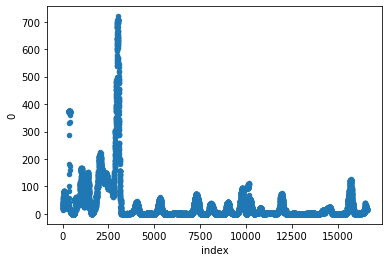

In [65]:
all_cells.sum(axis=0).reset_index().plot.scatter(x='index',y=0)